### Petit exo de crunching de data

Spéciale dédicace à [la doc et aux tutox pandas](https://pandas.pydata.org/pandas-docs/stable/getting_started/index.html) (et au brownie au chocolat) qui m'ont accompagné dans mon travail.

Plus sérieusement, je n'avais jamais utilisé la librairie pandas donc il y a sans doute des bonnes pratiques que je n'ai pas utilisé ici (typiquement sur la manipulation des DataFrame, la création de nouvelles Series à partir des données existantes et l'utilisation des jointures) qui auraient permis d'améliorer la complexité.

J'espère avoir l'occasion d'en apprendre plus avec vous, bonne lecture :)

J'ai commencé par lire les données, regarder comment elles sont structurées, le type des données etc...

In [1]:
import numpy as np
import pandas as pd
from math import *


# Read files
ticket = pd.read_csv('data/ticket_data.csv')
cities = pd.read_csv('data/cities.csv')
stations = pd.read_csv('data/stations.csv')
providers = pd.read_csv('data/providers.csv')

# Print the beginning of each table 
ticket.head(5)
# print(ticket.dtypes)


,id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00,2017-10-13 20:10:00+00,4550,2017-10-01 00:13:31.327+00,NaN,NaN,611,542
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00,2017-10-14 06:55:00+00,1450,2017-10-01 00:13:35.773+00,"{149,418}",{13},611,542
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 21:24:00+00,7400,2017-10-01 00:13:40.212+00,"{798,798,6794,6246}","{8377,8376}",611,542
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 11:02:00+00,13500,2017-10-01 00:13:40.213+00,"{798,798,6794,6246}","{8377,8376}",611,542
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00,2017-10-14 19:32:00+00,7710,2017-10-01 00:13:40.213+00,"{5983,5983}",{8380},611,542


In [2]:
cities.head(5)

,id,local_name,unique_name,latitude,longitude,population
0,5159,"Padua, Veneto, Italia",padua,45.406435,11.876761,209678.0
1,76,"Barcelona, Cataluña, España",barcelona,41.385064,2.173404,1611822.0
2,81,"Basel, Basel-Stadt, Schweiz",basel,47.593437,7.619812,NaN
3,259,"Erlangen, Bayern, Deutschland",erlangen,49.589674,11.011961,105412.0
4,11979,"Balș, Olt, România",balș,44.353354,24.095672,NaN


J'ai regroupé les données de cette table sur [cette carte](https://www.google.com/maps/d/drive?state=%7B%22ids%22%3A%5B%221SCtohRgpZx25PPXqwESSYXBAwHAavsQm%22%5D%2C%22action%22%3A%22open%22%2C%22userId%22%3A%22108743094703036959176%22%7D&usp=sharing). Ça ne sert à rien dans la suite mais ça donne un aperçu plus visuel de ces données (qui permet par exemple de constater la présence surprenante de Reykjavík et d'une ville de Somalie).

In [3]:
stations.head(5)

,id,unique_name,latitude,longitude
0,1,Aalen (Stuttgarter Straße),48.835296,10.092956
1,2,Aéroport Bordeaux-Mérignac,44.830226,-0.700883
2,3,Aéroport CDG,49.009900,2.559310
3,4,Aéroport de Berlin-Schönefeld,52.389446,13.520345
4,5,Aéroport de Dresden,51.123604,13.764737


In [4]:
providers.head(5)

,id,company_id,provider_id,name,fullname,has_wifi,has_plug,has_adjustable_seats,has_bicycle,transport_type
0,9,1,NaN,ouibus,Ouibus,True,True,True,False,bus
1,10,2,NaN,deinbus,Deinbus.de,False,False,False,False,bus
2,11,3,NaN,infobus,Infobus,False,False,False,False,bus
3,12,4,NaN,studentAgency,Student Agency,False,False,False,False,bus
4,13,5,NaN,flixbus,Flixbus,True,False,False,False,bus


In [5]:
# Compute and add a journey time column

ticket['arrival_ts'] = ticket['arrival_ts'].astype('datetime64')
ticket['departure_ts'] = ticket['departure_ts'].astype('datetime64')
ticket['journey_time'] = pd.Series((ticket['arrival_ts'] - ticket['departure_ts']), index = ticket.index)

ticket.head(5)

,id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city,journey_time
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00,2017-10-13 20:10:00,4550,2017-10-01 00:13:31.327+00,NaN,NaN,611,542,0 days 06:10:00
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00,2017-10-14 06:55:00,1450,2017-10-01 00:13:35.773+00,"{149,418}",{13},611,542,0 days 17:50:00
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00,2017-10-14 21:24:00,7400,2017-10-01 00:13:40.212+00,"{798,798,6794,6246}","{8377,8376}",611,542,1 days 07:57:00
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00,2017-10-14 11:02:00,13500,2017-10-01 00:13:40.213+00,"{798,798,6794,6246}","{8377,8376}",611,542,0 days 21:35:00
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00,2017-10-14 19:32:00,7710,2017-10-01 00:13:40.213+00,"{5983,5983}",{8380},611,542,0 days 21:46:00


In [17]:
# Join ticket and cities

# Join on origin_city
ticket_o_cities = pd.merge(ticket, cities, how = 'outer', left_on = 'o_city', right_on = 'id', suffixes=('_ticket', '_origin'))

# Join on destination_city
ticket_cities = pd.merge(ticket_o_cities, cities, how = 'outer', left_on = 'd_city', right_on = 'id', suffixes=('_origin', '_destination'))

# Convert cents into euros
ticket_cities['price'] = ticket_cities['price_in_cents'].apply(lambda x: x/100 )

# Group by cities
ticket_cities_grouped = ticket_cities.groupby(['unique_name_origin', 'unique_name_destination'])

# Compute stat on prices per different trip
for cities, group in ticket_cities_grouped :
    print("Trip: ", cities)
    print("-" * 7)
    
    # Show each ticket of the trip with the price
    # print(group, "\n")
    
    # Compute statistics over prices and journey_time for each trip 
    print(group[['price_in_cents','journey_time']].describe(), end = "\n\n")


Trip:  ('aeroport-paris-vatry-', 'troyes')
-------
       price_in_cents     journey_time
count             1.0                1
mean           5300.0  0 days 21:55:00
std               NaN              NaT
min            5300.0  0 days 21:55:00
25%            5300.0  0 days 21:55:00
50%            5300.0  0 days 21:55:00
75%            5300.0  0 days 21:55:00
max            5300.0  0 days 21:55:00

Trip:  ('agde', 'amsterdam')
-------
       price_in_cents            journey_time
count        5.000000                       5
mean     20320.000000         0 days 10:18:48
std       1370.036496  0 days 03:07:23.350034
min      18600.000000         0 days 08:53:00
25%      19300.000000         0 days 08:54:00
50%      20600.000000         0 days 08:56:00
75%      21100.000000         0 days 08:57:00
max      22000.000000         0 days 15:54:00

Trip:  ('agen', 'dijon')
-------
       price_in_cents            journey_time
count        2.000000                       2
mean     11755.00000

       price_in_cents            journey_time
count       29.000000                      29
mean      7394.827586  0 days 09:29:20.689655
std       3742.248771  0 days 06:47:00.227846
min       2000.000000         0 days 04:18:00
25%       3790.000000         0 days 04:37:00
50%       7900.000000         0 days 05:37:00
75%      10650.000000         0 days 12:35:00
max      13380.000000         1 days 01:20:00

Trip:  ('amiens', 'boulogne-sur-mer')
-------
       price_in_cents            journey_time
count            25.0                      25
mean            974.0         0 days 01:32:24
std             120.0  0 days 00:18:19.272486
min             950.0         0 days 01:20:00
25%             950.0         0 days 01:20:00
50%             950.0         0 days 01:20:00
75%             950.0         0 days 01:40:00
max            1550.0         0 days 02:40:00

Trip:  ('amiens', 'lille')
-------
       price_in_cents            journey_time
count       60.000000                      

       price_in_cents            journey_time
count       32.000000                      32
mean      5603.125000         0 days 06:04:15
std       1537.436991  0 days 03:05:56.773727
min       2480.000000         0 days 04:25:00
25%       4780.000000         0 days 04:31:00
50%       5680.000000         0 days 05:08:30
75%       7030.000000         0 days 06:19:00
max       8080.000000         0 days 18:05:00

Trip:  ('annecy', 'milano')
-------
       price_in_cents            journey_time
count        3.000000                       3
mean      2626.666667         0 days 15:45:00
std        317.857410  0 days 07:07:12.011235
min       2400.000000         0 days 08:15:00
25%       2445.000000         0 days 12:25:00
50%       2490.000000         0 days 16:35:00
75%       2740.000000         0 days 19:30:00
max       2990.000000         0 days 22:25:00

Trip:  ('annecy', 'nantes')
-------
       price_in_cents            journey_time
count        4.000000                       4
mean  

       price_in_cents            journey_time
count       25.000000                      25
mean      3873.200000  0 days 07:00:28.800000
std       2133.177833  0 days 07:33:26.571559
min       1200.000000         0 days 01:50:00
25%       1550.000000         0 days 02:30:00
50%       4300.000000         0 days 03:17:00
75%       5250.000000         0 days 10:17:00
max       7700.000000         1 days 01:30:00

Trip:  ('arras', 'paris')
-------
       price_in_cents            journey_time
count        4.000000                       4
mean      2652.500000         0 days 08:05:00
std        870.646312  0 days 04:23:32.020743
min       1550.000000         0 days 02:40:00
25%       2405.000000         0 days 06:36:15
50%       2690.000000         0 days 08:07:30
75%       2937.500000         0 days 09:36:15
max       3680.000000         0 days 13:25:00

Trip:  ('arras', 'rennes')
-------
       price_in_cents            journey_time
count       13.000000                      13
mean     

       price_in_cents            journey_time
count       25.000000                      25
mean      3457.600000  0 days 05:28:50.400000
std       1420.065374  0 days 03:49:27.360095
min       1200.000000         0 days 03:00:00
25%       1890.000000         0 days 03:49:00
50%       4410.000000         0 days 04:00:00
75%       4790.000000         0 days 05:26:00
max       4990.000000         0 days 20:50:00

Trip:  ('avignon', 'torino')
-------
       price_in_cents            journey_time
count        6.000000                       6
mean      3408.333333         0 days 19:25:00
std        363.340979  0 days 06:24:37.781522
min       3000.000000         0 days 10:40:00
25%       3290.000000         0 days 15:58:45
50%       3340.000000         0 days 18:25:00
75%       3390.000000         1 days 00:21:15
max       4090.000000         1 days 03:30:00

Trip:  ('avignon', 'valencia')
-------
       price_in_cents     journey_time
count             1.0                1
mean           8

       price_in_cents            journey_time
count       24.000000                      24
mean      1933.333333  0 days 02:50:37.500000
std        226.824327  0 days 00:57:02.027431
min       1400.000000         0 days 02:20:00
25%       1800.000000         0 days 02:30:00
50%       1900.000000         0 days 02:40:00
75%       2050.000000         0 days 02:40:00
max       2400.000000         0 days 07:05:00

Trip:  ('besancon', 'nice')
-------
       price_in_cents            journey_time
count       19.000000                      19
mean      5751.052632  0 days 15:34:53.684210
std       3985.951573  0 days 06:30:51.805002
min       2390.000000         0 days 06:50:00
25%       3385.000000         0 days 09:25:00
50%       4090.000000         0 days 16:30:00
75%       5925.000000         0 days 20:57:30
max      15520.000000         1 days 04:50:00

Trip:  ('besancon', 'strasbourg')
-------
       price_in_cents            journey_time
count       26.000000                      26


       price_in_cents            journey_time
count       32.000000                      32
mean      8125.000000  0 days 16:00:11.250000
std       3199.711681  0 days 07:12:41.626241
min       3190.000000         0 days 07:11:00
25%       5107.500000         0 days 10:47:45
50%       7785.000000         0 days 15:16:00
75%      11402.500000         0 days 17:58:15
max      12360.000000         1 days 05:42:00

Trip:  ('bordeaux', 'geneve')
-------
       price_in_cents            journey_time
count        2.000000                       2
mean      6690.000000         0 days 23:25:00
std        282.842712  0 days 04:00:24.978336
min       6490.000000         0 days 20:35:00
25%       6590.000000         0 days 22:00:00
50%       6690.000000         0 days 23:25:00
75%       6790.000000         1 days 00:50:00
max       6890.000000         1 days 02:15:00

Trip:  ('bordeaux', 'gerona')
-------
       price_in_cents            journey_time
count        4.000000                       4
me

       price_in_cents            journey_time
count        3.000000                       3
mean      9553.333333         0 days 09:44:40
std        680.685929  0 days 00:42:55.344637
min       9020.000000         0 days 09:11:00
25%       9170.000000         0 days 09:20:30
50%       9320.000000         0 days 09:30:00
75%       9820.000000         0 days 10:01:30
max      10320.000000         0 days 10:33:00

Trip:  ('boulogne-sur-mer', 'arras')
-------
       price_in_cents            journey_time
count       48.000000                      48
mean      2993.333333  0 days 05:19:02.500000
std        647.000718  0 days 06:07:03.528472
min        850.000000         0 days 01:30:00
25%       2937.500000         0 days 02:40:15
50%       3330.000000         0 days 03:06:00
75%       3330.000000         0 days 04:11:30
max       3440.000000         1 days 02:10:00

Trip:  ('bourges', 'amsterdam')
-------
       price_in_cents            journey_time
count       10.000000                  

       price_in_cents            journey_time
count        2.000000                       2
mean      2350.000000         0 days 11:20:00
std         70.710678  0 days 01:38:59.696961
min       2300.000000         0 days 10:10:00
25%       2325.000000         0 days 10:45:00
50%       2350.000000         0 days 11:20:00
75%       2375.000000         0 days 11:55:00
max       2400.000000         0 days 12:30:00

Trip:  ('brive-la-gaillarde', 'biarritz')
-------
       price_in_cents            journey_time
count        10.00000                      10
mean       4476.00000         0 days 13:33:36
std        2143.37325  0 days 04:20:40.670062
min        2390.00000         0 days 07:40:00
25%        2475.00000         0 days 10:53:45
50%        4160.00000         0 days 12:42:30
75%        6340.00000         0 days 15:17:00
max        7800.00000         0 days 23:30:00

Trip:  ('brive-la-gaillarde', 'cholet')
-------
       price_in_cents            journey_time
count        7.000000     

       price_in_cents            journey_time
count       86.000000                      86
mean      8962.441860  0 days 09:06:20.930232
std       5231.998816  0 days 08:03:01.467653
min       2800.000000         0 days 03:35:00
25%       5150.000000         0 days 04:17:00
50%       6150.000000         0 days 06:50:00
75%      14450.000000         0 days 07:47:30
max      19600.000000         1 days 08:40:00

Trip:  ('bruxelles', 'macon')
-------
       price_in_cents            journey_time
count       18.000000                      18
mean      4311.666667         0 days 14:57:30
std        557.222629  0 days 07:16:59.149939
min       3700.000000         0 days 09:55:00
25%       3990.000000         0 days 10:15:00
50%       4195.000000         0 days 11:42:30
75%       4400.000000         0 days 16:05:00
max       5390.000000         1 days 06:05:00

Trip:  ('bruxelles', 'mannheim')
-------
       price_in_cents            journey_time
count        6.000000                       6

       price_in_cents            journey_time
count        7.000000                       7
mean      7092.857143  0 days 14:36:25.714285
std       4251.951373  0 days 06:02:42.358065
min       3700.000000         0 days 05:48:00
25%       4795.000000         0 days 11:13:30
50%       4980.000000         0 days 16:30:00
75%       8490.000000         0 days 18:27:30
max      14400.000000         0 days 20:35:00

Trip:  ('calais', 'paris')
-------
       price_in_cents            journey_time
count       40.000000                      40
mean      3622.500000         0 days 05:50:21
std       1622.730763  0 days 05:20:23.982857
min       2050.000000         0 days 02:50:00
25%       2590.000000         0 days 03:34:15
50%       2860.000000         0 days 04:09:00
75%       4527.500000         0 days 05:02:00
max       7960.000000         1 days 00:10:00

Trip:  ('cannes', 'aix-en-provence')
-------
       price_in_cents            journey_time
count       45.000000                      4

       price_in_cents            journey_time
count        6.000000                       6
mean      1191.666667         0 days 01:53:20
std        180.046290  0 days 00:21:36.148139
min       1100.000000         0 days 01:30:00
25%       1100.000000         0 days 01:40:00
50%       1100.000000         0 days 01:45:00
75%       1175.000000         0 days 02:12:30
max       1550.000000         0 days 02:20:00

Trip:  ('chanas', 'chessy')
-------
       price_in_cents            journey_time
count        6.000000                       6
mean      4016.666667         0 days 05:58:20
std        301.109061  0 days 00:36:00.555484
min       3600.000000         0 days 05:00:00
25%       3837.500000         0 days 05:42:30
50%       4000.000000         0 days 06:05:00
75%       4237.500000         0 days 06:20:00
max       4400.000000         0 days 06:40:00

Trip:  ('chantenay', 'beziers')
-------
       price_in_cents            journey_time
count       10.000000                      10
me

       price_in_cents            journey_time
count       36.000000                      36
mean      4282.222222         0 days 07:04:50
std       1459.187858  0 days 03:04:40.922602
min       2300.000000         0 days 04:30:00
25%       2590.000000         0 days 04:54:00
50%       4500.000000         0 days 05:39:30
75%       5400.000000         0 days 08:25:00
max       6200.000000         0 days 16:20:00

Trip:  ('chatellerault', 'paris')
-------
       price_in_cents            journey_time
count        4.000000                       4
mean      2915.000000         0 days 13:25:00
std        595.790791  0 days 10:52:36.608637
min       2150.000000         0 days 03:40:00
25%       2600.000000         0 days 04:10:00
50%       3015.000000         0 days 13:35:00
75%       3330.000000         0 days 22:50:00
max       3480.000000         0 days 22:50:00

Trip:  ('chaumont', 'arles')
-------
       price_in_cents            journey_time
count       27.000000                      27

       price_in_cents            journey_time
count       21.000000                      21
mean      8951.428571  0 days 03:29:45.714285
std       2812.422951  0 days 00:59:16.178526
min       2150.000000         0 days 02:17:00
25%       6410.000000         0 days 02:42:00
50%      10850.000000         0 days 03:35:00
75%      10910.000000         0 days 04:08:00
max      11440.000000         0 days 05:44:00

Trip:  ('compiegne', 'dunkerque')
-------
       price_in_cents            journey_time
count       11.000000                      11
mean      4037.272727         0 days 03:58:00
std        281.534755  0 days 00:52:33.740636
min       3450.000000         0 days 03:04:00
25%       3900.000000         0 days 03:29:00
50%       4130.000000         0 days 03:55:00
75%       4130.000000         0 days 04:04:00
max       4440.000000         0 days 06:16:00

Trip:  ('compiegne', 'reims')
-------
       price_in_cents            journey_time
count       11.000000                      1

       price_in_cents            journey_time
count        4.000000                       4
mean      1847.500000         0 days 07:16:15
std        921.425526  0 days 06:07:13.667420
min       1100.000000         0 days 02:00:00
25%       1100.000000         0 days 02:00:00
50%       1650.000000         0 days 06:52:30
75%       2397.500000         0 days 12:08:45
max       2990.000000         0 days 13:20:00

Trip:  ('etain', 'amsterdam')
-------
       price_in_cents            journey_time
count        6.000000                       6
mean     21383.333333         0 days 12:30:20
std       1426.417424  0 days 05:01:39.471815
min      19550.000000         0 days 08:42:00
25%      20200.000000         0 days 09:18:30
50%      22150.000000         0 days 09:57:00
75%      22375.000000         0 days 14:38:30
max      22450.000000         0 days 21:08:00

Trip:  ('evreux', 'bernay')
-------
       price_in_cents            journey_time
count        8.000000                       8
mean

       price_in_cents            journey_time
count       27.000000                      27
mean      7614.814815  0 days 05:45:35.555555
std       2777.720940  0 days 01:59:15.269888
min       2800.000000         0 days 04:07:00
25%       5850.000000         0 days 04:13:00
50%       6800.000000         0 days 04:25:00
75%       9850.000000         0 days 07:50:00
max      11900.000000         0 days 09:20:00

Trip:  ('geneve', 'amsterdam')
-------
       price_in_cents            journey_time
count        6.000000                       6
mean     18888.333333         0 days 14:49:00
std       9145.994570  0 days 04:14:44.109395
min       6600.000000         0 days 08:40:00
25%      11622.500000         0 days 12:16:45
50%      21640.000000         0 days 15:25:00
75%      25140.000000         0 days 18:31:00
max      28860.000000         0 days 18:37:00

Trip:  ('geneve', 'annecy')
-------
       price_in_cents            journey_time
count            10.0                      10
mea

       price_in_cents            journey_time
count       57.000000                      57
mean     13371.578947  0 days 13:29:47.368421
std       3335.022376  0 days 08:04:20.378188
min       3500.000000         0 days 04:50:00
25%      11100.000000         0 days 08:45:00
50%      14000.000000         0 days 09:44:00
75%      15500.000000         0 days 15:41:00
max      17900.000000         1 days 17:45:00

Trip:  ('grenoble', 'cannes')
-------
       price_in_cents            journey_time
count       70.000000                      70
mean      4963.428571  0 days 12:51:21.428571
std       2957.946745  0 days 07:21:37.141507
min       1500.000000         0 days 04:40:00
25%       3000.000000         0 days 06:10:00
50%       3500.000000         0 days 11:30:00
75%       8710.000000         0 days 19:11:15
max      11810.000000         1 days 03:55:00

Trip:  ('grenoble', 'chateau-thierry')
-------
       price_in_cents            journey_time
count        6.000000                  

       price_in_cents            journey_time
count       23.000000                      23
mean      4033.478261  0 days 22:07:23.478260
std       1301.476814  0 days 09:13:47.177076
min       1600.000000         0 days 08:00:00
25%       3190.000000         0 days 13:45:00
50%       4180.000000         1 days 00:10:00
75%       4990.000000         1 days 00:47:30
max       6600.000000         1 days 15:05:00

Trip:  ('la-rochelle', 'bordeaux')
-------
       price_in_cents            journey_time
count      137.000000                     137
mean      1427.883212  0 days 03:23:34.598540
std        293.642016  0 days 03:27:43.915800
min        980.000000         0 days 01:40:00
25%       1300.000000         0 days 02:00:00
50%       1300.000000         0 days 02:20:00
75%       1450.000000         0 days 02:30:00
max       3490.000000         1 days 00:00:00

Trip:  ('la-rochelle', 'chambery')
-------
       price_in_cents            journey_time
count       10.000000                 

-------
       price_in_cents            journey_time
count        3.000000                       3
mean      4000.000000         0 days 07:12:40
std       1510.099334  0 days 03:24:41.156297
min       2500.000000         0 days 03:20:00
25%       3240.000000         0 days 05:56:30
50%       3980.000000         0 days 08:33:00
75%       4750.000000         0 days 09:09:00
max       5520.000000         0 days 09:45:00

Trip:  ('le-creusot---montceau-tgv-', 'nice')
-------
       price_in_cents            journey_time
count       16.000000                      16
mean     10387.500000  0 days 10:00:07.500000
std       3025.309901  0 days 06:33:06.262527
min       4650.000000         0 days 05:18:00
25%       9687.500000         0 days 05:39:45
50%      11100.000000         0 days 07:04:30
75%      12212.500000         0 days 11:44:15
max      14150.000000         1 days 01:14:00

Trip:  ('le-havre', 'bordeaux')
-------
       price_in_cents            journey_time
count       54.000000 

       price_in_cents            journey_time
count       13.000000                      13
mean      4473.846154  0 days 09:55:23.076923
std       1282.689482  0 days 04:37:42.590527
min       2500.000000         0 days 05:30:00
25%       3800.000000         0 days 06:10:00
50%       4300.000000         0 days 08:50:00
75%       5690.000000         0 days 10:50:00
max       6590.000000         0 days 18:30:00

Trip:  ('lille', 'aeroport-paris-vatry-')
-------
       price_in_cents            journey_time
count        5.000000                       5
mean      3478.000000         0 days 04:46:00
std       2027.848614  0 days 02:02:48.039087
min       1800.000000         0 days 02:40:00
25%       2050.000000         0 days 02:50:00
50%       2150.000000         0 days 04:40:00
75%       5690.000000         0 days 06:40:00
max       5700.000000         0 days 07:00:00

Trip:  ('lille', 'aix-en-provence')
-------
       price_in_cents            journey_time
count       16.000000         

       price_in_cents            journey_time
count       23.000000                      23
mean      3377.826087  0 days 07:29:28.695652
std        939.366114  0 days 06:30:11.926118
min       1990.000000         0 days 03:30:00
25%       2750.000000         0 days 04:00:00
50%       3000.000000         0 days 04:40:00
75%       4120.000000         0 days 07:19:30
max       5720.000000         1 days 02:46:00

Trip:  ('limoges', 'paris-aeroport-orly')
-------
       price_in_cents            journey_time
count        5.000000                       5
mean      3140.000000         0 days 14:04:00
std        288.097206  0 days 00:44:12.922916
min       2700.000000         0 days 13:35:00
25%       3100.000000         0 days 13:35:00
50%       3100.000000         0 days 13:35:00
75%       3400.000000         0 days 14:20:00
max       3400.000000         0 days 15:15:00

Trip:  ('limoges', 'reims')
-------
       price_in_cents            journey_time
count       27.000000                 

       price_in_cents            journey_time
count       30.000000                      30
mean      2415.666667         0 days 08:41:30
std        634.761336  0 days 04:31:22.958089
min       1700.000000         0 days 03:10:00
25%       1890.000000         0 days 05:30:00
50%       2235.000000         0 days 06:57:30
75%       2855.000000         0 days 12:00:00
max       3590.000000         0 days 19:40:00

Trip:  ('lyon', 'avignon')
-------
       price_in_cents            journey_time
count      228.000000                     228
mean      1668.289474  0 days 04:14:08.684210
std        345.448906  0 days 03:49:03.636029
min        850.000000         0 days 02:00:00
25%       1550.000000         0 days 02:30:00
50%       1700.000000         0 days 02:50:00
75%       1800.000000         0 days 03:20:00
max       3000.000000         0 days 22:20:00

Trip:  ('lyon', 'barcelona')
-------
       price_in_cents            journey_time
count        7.000000                       7
mean  

       price_in_cents            journey_time
count       48.000000                      48
mean      5571.250000  0 days 11:38:37.500000
std       2711.894702  0 days 06:09:35.864827
min       3000.000000         0 days 06:30:00
25%       3950.000000         0 days 07:10:00
50%       5025.000000         0 days 10:22:30
75%       5820.000000         0 days 13:00:00
max      12240.000000         1 days 10:30:00

Trip:  ('lyon', 'nice')
-------
       price_in_cents            journey_time
count       60.000000                      60
mean      3322.333333         0 days 07:15:30
std        569.249779  0 days 04:40:45.220616
min       1700.000000         0 days 04:20:00
25%       3100.000000         0 days 05:00:00
50%       3500.000000         0 days 05:30:00
75%       3600.000000         0 days 06:20:00
max       4400.000000         1 days 03:45:00

Trip:  ('lyon', 'nimes')
-------
       price_in_cents            journey_time
count       21.000000                      21
mean      355

       price_in_cents            journey_time
count       16.000000                      16
mean      3570.000000  0 days 09:03:07.500000
std        487.141321  0 days 05:41:10.722996
min       2590.000000         0 days 05:20:00
25%       3340.000000         0 days 06:05:00
50%       3595.000000         0 days 07:47:30
75%       3800.000000         0 days 09:22:30
max       4750.000000         1 days 04:45:00

Trip:  ('marseille', 'bettembourg')
-------
       price_in_cents            journey_time
count        4.000000                       4
mean      6487.500000         0 days 09:17:30
std        632.949445  0 days 02:09:58.076685
min       5800.000000         0 days 07:50:00
25%       6137.500000         0 days 08:05:00
50%       6425.000000         0 days 08:25:00
75%       6775.000000         0 days 09:37:30
max       7300.000000         0 days 12:30:00

Trip:  ('marseille', 'bilbao')
-------
       price_in_cents            journey_time
count       10.000000                    

       price_in_cents     journey_time
count             1.0                1
mean           8500.0  0 days 19:10:00
std               NaN              NaT
min            8500.0  0 days 19:10:00
25%            8500.0  0 days 19:10:00
50%            8500.0  0 days 19:10:00
75%            8500.0  0 days 19:10:00
max            8500.0  0 days 19:10:00

Trip:  ('marseille', 'metz')
-------
       price_in_cents            journey_time
count       32.000000                      32
mean      4923.125000  0 days 10:45:46.875000
std       1517.968586  0 days 05:38:08.133896
min       1880.000000         0 days 07:00:00
25%       4260.000000         0 days 07:50:00
50%       5525.000000         0 days 08:15:00
75%       5925.000000         0 days 11:51:15
max       6850.000000         1 days 09:55:00

Trip:  ('marseille', 'millau')
-------
       price_in_cents     journey_time
count             1.0                1
mean           1550.0  0 days 05:40:00
std               NaN              NaT
m

       price_in_cents            journey_time
count       10.000000                      10
mean      7107.000000         0 days 07:33:30
std       2871.670246  0 days 02:01:54.656519
min       2750.000000         0 days 05:20:00
25%       4277.500000         0 days 06:30:30
50%       8760.000000         0 days 06:45:30
75%       9410.000000         0 days 08:19:00
max       9410.000000         0 days 11:58:00

Trip:  ('montargis', 'strasbourg')
-------
       price_in_cents            journey_time
count       12.000000                      12
mean      8545.833333         0 days 06:18:45
std       4827.831168  0 days 02:56:15.550275
min       2600.000000         0 days 03:50:00
25%       3465.000000         0 days 03:51:45
50%      10640.000000         0 days 05:00:00
75%      12325.000000         0 days 09:21:15
max      16050.000000         0 days 11:10:00

Trip:  ('montauban', 'la-roche-sur-yon')
-------
       price_in_cents            journey_time
count        6.000000           

       price_in_cents            journey_time
count       11.000000                      11
mean      4359.090909  0 days 04:39:49.090909
std       2716.948489  0 days 02:16:17.884145
min       1000.000000         0 days 02:48:00
25%       1600.000000         0 days 02:50:00
50%       6100.000000         0 days 03:10:00
75%       6795.000000         0 days 06:17:30
max       7020.000000         0 days 08:35:00

Trip:  ('munchen', 'paris')
-------
       price_in_cents            journey_time
count       19.000000                      19
mean      9460.000000  0 days 16:45:12.631578
std       5050.085808  0 days 09:26:34.908906
min       2890.000000         0 days 06:18:00
25%       4735.000000         0 days 08:34:30
50%      10600.000000         0 days 14:15:00
75%      13650.000000         0 days 22:51:30
max      18200.000000         1 days 13:32:00

Trip:  ('munster', 'darmstadt')
-------
       price_in_cents            journey_time
count       18.000000                      18
me

       price_in_cents            journey_time
count      128.000000                     128
mean      2596.796875  0 days 04:11:00.937500
std        328.810631  0 days 02:35:02.342050
min       1290.000000         0 days 03:20:00
25%       2400.000000         0 days 03:30:00
50%       2650.000000         0 days 03:30:00
75%       2750.000000         0 days 03:50:00
max       3640.000000         0 days 20:35:00

Trip:  ('nantes', 'bruxelles')
-------
       price_in_cents            journey_time
count       17.000000                      17
mean     11412.941176  0 days 05:56:45.882352
std       3381.506256  0 days 00:50:17.314739
min       4650.000000         0 days 05:02:00
25%       9280.000000         0 days 05:18:00
50%      12350.000000         0 days 05:40:00
75%      13850.000000         0 days 06:20:00
max      16420.000000         0 days 08:08:00

Trip:  ('nantes', 'cardiff')
-------
       price_in_cents            journey_time
count        4.000000                       4
me

       price_in_cents            journey_time
count        9.000000                       9
mean      5012.222222  0 days 07:31:26.666666
std       1239.644886  0 days 01:45:49.456669
min       4150.000000         0 days 05:50:00
25%       4200.000000         0 days 06:40:00
50%       4550.000000         0 days 07:14:00
75%       4780.000000         0 days 07:44:00
max       7540.000000         0 days 11:35:00

Trip:  ('nantes', 'troyes')
-------
       price_in_cents            journey_time
count        9.000000                       9
mean      2132.222222         0 days 12:10:00
std        198.354341  0 days 04:59:47.495656
min       2000.000000         0 days 07:55:00
25%       2000.000000         0 days 08:30:00
50%       2000.000000         0 days 10:00:00
75%       2390.000000         0 days 17:00:00
max       2400.000000         0 days 21:00:00

Trip:  ('nantes', 'utrecht')
-------
       price_in_cents            journey_time
count        7.000000                       7
mean 

       price_in_cents            journey_time
count        7.000000                       7
mean      4281.428571  1 days 16:11:25.714285
std        810.975309  2 days 15:09:14.594034
min       3080.000000         0 days 08:05:00
25%       3830.000000         0 days 12:30:00
50%       4590.000000         0 days 18:35:00
75%       4780.000000         0 days 23:30:00
max       5080.000000         7 days 14:40:00

Trip:  ('nice', 'poitiers')
-------
       price_in_cents            journey_time
count        3.000000                       3
mean      6086.666667         1 days 02:38:20
std        452.806066  0 days 01:39:17.348403
min       5690.000000         1 days 00:45:00
25%       5840.000000         1 days 02:02:30
50%       5990.000000         1 days 03:20:00
75%       6285.000000         1 days 03:35:00
max       6580.000000         1 days 03:50:00

Trip:  ('nice', 'quimper')
-------
       price_in_cents            journey_time
count       12.000000                      12
mean   

       price_in_cents            journey_time
count        2.000000                       2
mean      7250.000000         0 days 10:52:30
std       1909.188309  0 days 01:28:23.300858
min       5900.000000         0 days 09:50:00
25%       6575.000000         0 days 10:21:15
50%       7250.000000         0 days 10:52:30
75%       7925.000000         0 days 11:23:45
max       8600.000000         0 days 11:55:00

Trip:  ('ouistreham', 'paris')
-------
       price_in_cents            journey_time
count       58.000000                      58
mean      1834.482759  0 days 03:01:02.068965
std        275.968295  0 days 00:45:59.152398
min       1200.000000         0 days 02:30:00
25%       1800.000000         0 days 02:40:00
50%       1800.000000         0 days 02:50:00
75%       1900.000000         0 days 03:00:00
max       2400.000000         0 days 05:30:00

Trip:  ('pamiers', 'toulouse')
-------
       price_in_cents            journey_time
count        9.000000                       9


       price_in_cents            journey_time
count       17.000000                      17
mean      4098.235294  0 days 07:58:14.117647
std       1067.802857  0 days 02:00:17.121187
min       2900.000000         0 days 06:00:00
25%       3290.000000         0 days 06:20:00
50%       4150.000000         0 days 06:50:00
75%       4400.000000         0 days 09:50:00
max       7300.000000         0 days 11:20:00

Trip:  ('paris', 'bourg-saint-maurice')
-------
       price_in_cents            journey_time
count       39.000000                      39
mean      5386.666667  0 days 06:45:23.076923
std       1645.268069  0 days 00:35:19.516024
min       3600.000000         0 days 05:37:00
25%       4650.000000         0 days 06:25:00
50%       4750.000000         0 days 06:50:00
75%       5150.000000         0 days 07:10:00
max       9530.000000         0 days 08:10:00

Trip:  ('paris', 'bourges')
-------
       price_in_cents            journey_time
count       50.000000                   

       price_in_cents            journey_time
count        7.000000                       7
mean      3964.285714  0 days 05:52:51.428571
std        424.964985  0 days 00:26:16.614818
min       3350.000000         0 days 05:10:00
25%       3800.000000         0 days 05:40:00
50%       3950.000000         0 days 05:50:00
75%       4050.000000         0 days 06:10:00
max       4750.000000         0 days 06:30:00

Trip:  ('paris', 'dijon')
-------
       price_in_cents            journey_time
count      109.000000                     109
mean      2635.321101  0 days 04:24:24.220183
std       1001.626981  0 days 02:25:25.507126
min       1390.000000         0 days 02:50:00
25%       2190.000000         0 days 03:10:00
50%       2400.000000         0 days 03:30:00
75%       2480.000000         0 days 04:40:00
max       5500.000000         0 days 19:25:00

Trip:  ('paris', 'dole-choisey')
-------
       price_in_cents            journey_time
count      137.000000                     137
mea

       price_in_cents            journey_time
count       22.000000                      22
mean      2255.454545  0 days 03:04:32.727272
std        678.967895  0 days 01:57:13.569967
min       1550.000000         0 days 01:46:00
25%       1700.000000         0 days 02:10:45
50%       1800.000000         0 days 02:43:30
75%       2920.000000         0 days 03:20:00
max       3530.000000         0 days 11:18:00

Trip:  ('paris', 'limoges')
-------
       price_in_cents            journey_time
count      151.000000                     151
mean      4000.529801  0 days 06:13:25.430463
std       2039.665590  0 days 04:34:48.591600
min       1700.000000         0 days 03:30:00
25%       2850.000000         0 days 04:00:00
50%       3000.000000         0 days 04:29:00
75%       4875.000000         0 days 06:06:30
max      10290.000000         1 days 03:40:00

Trip:  ('paris', 'linz')
-------
       price_in_cents            journey_time
count        5.000000                       5
mean     

       price_in_cents            journey_time
count     2459.000000                    2459
mean      3678.385523  0 days 04:59:19.202928
std       1935.244931  0 days 03:42:07.984166
min       1200.000000         0 days 02:16:00
25%       2750.000000         0 days 03:40:00
50%       2900.000000         0 days 04:00:00
75%       3350.000000         0 days 04:40:00
max      11120.000000         1 days 16:24:00

Trip:  ('paris', 'nice')
-------
       price_in_cents            journey_time
count      499.000000                     499
mean      7054.689379  0 days 15:54:01.082164
std       3728.854122  0 days 06:38:06.849964
min       2390.000000         0 days 06:39:00
25%       4395.000000         0 days 10:40:00
50%       6250.000000         0 days 14:30:00
75%       7580.000000         0 days 16:50:00
max      19600.000000         1 days 16:42:00

Trip:  ('paris', 'nimes')
-------
       price_in_cents            journey_time
count       85.000000                      85
mean      5

       price_in_cents            journey_time
count        8.000000                       8
mean      2791.250000  0 days 13:28:07.500000
std        512.150578  0 days 04:41:58.159094
min       2300.000000         0 days 07:30:00
25%       2600.000000         0 days 10:06:15
50%       2600.000000         0 days 13:10:00
75%       2785.000000         0 days 15:28:45
max       3990.000000         0 days 22:45:00

Trip:  ('paris', 'toulon')
-------
       price_in_cents            journey_time
count      111.000000                     111
mean      5976.576577  0 days 08:51:15.675675
std        621.318972  0 days 00:59:21.721142
min       3800.000000         0 days 07:30:00
25%       5800.000000         0 days 08:10:00
50%       5900.000000         0 days 08:40:00
75%       6350.000000         0 days 09:10:00
max       8600.000000         0 days 14:50:00

Trip:  ('paris', 'toulouse')
-------
       price_in_cents            journey_time
count      515.000000                     515
mean  

       price_in_cents            journey_time
count        7.000000                       7
mean      2671.428571  0 days 11:29:17.142857
std        844.756939  0 days 09:25:38.221184
min       1400.000000         0 days 04:20:00
25%       2135.000000         0 days 05:05:00
50%       3000.000000         0 days 07:55:00
75%       3175.000000         0 days 15:35:00
max       3680.000000         1 days 02:50:00

Trip:  ('perpignan', 'alicante')
-------
       price_in_cents     journey_time
count             1.0                1
mean           5000.0  0 days 07:40:00
std               NaN              NaT
min            5000.0  0 days 07:40:00
25%            5000.0  0 days 07:40:00
50%            5000.0  0 days 07:40:00
75%            5000.0  0 days 07:40:00
max            5000.0  0 days 07:40:00

Trip:  ('perpignan', 'argeles-sur-mer')
-------
       price_in_cents            journey_time
count             3.0                       3
mean            920.0         0 days 06:07:40
std   

       price_in_cents            journey_time
count        7.000000                       7
mean      3965.714286  0 days 17:52:51.428571
std        482.073893  0 days 02:36:55.185302
min       3400.000000         0 days 15:25:00
25%       3600.000000         0 days 16:22:30
50%       3990.000000         0 days 17:05:00
75%       4235.000000         0 days 18:22:30
max       4700.000000         0 days 23:10:00

Trip:  ('ravensburg', 'rouen')
-------
       price_in_cents            journey_time
count        4.000000                       4
mean      5140.000000         0 days 17:47:30
std       1109.714678  0 days 01:17:43.689526
min       4000.000000         0 days 16:15:00
25%       4300.000000         0 days 17:07:30
50%       5140.000000         0 days 17:47:30
75%       5980.000000         0 days 18:27:30
max       6280.000000         0 days 19:20:00

Trip:  ('redon', 'brest')
-------
       price_in_cents            journey_time
count       18.000000                      18
mean 

       price_in_cents            journey_time
count       14.000000                      14
mean      5275.000000  0 days 13:13:04.285714
std        959.316664  0 days 06:05:43.013156
min       2400.000000         0 days 07:00:00
25%       5250.000000         0 days 08:00:00
50%       5500.000000         0 days 10:13:30
75%       5650.000000         0 days 20:20:45
max       6850.000000         0 days 21:20:00

Trip:  ('rennes', 'verdun')
-------
       price_in_cents            journey_time
count             2.0                       2
mean           2090.0         0 days 09:07:30
std               0.0  0 days 01:28:23.300858
min            2090.0         0 days 08:05:00
25%            2090.0         0 days 08:36:15
50%            2090.0         0 days 09:07:30
75%            2090.0         0 days 09:38:45
max            2090.0         0 days 10:10:00

Trip:  ('rennes', 'vitre')
-------
       price_in_cents            journey_time
count         5.00000                       5
mean   

       price_in_cents            journey_time
count       11.000000                      11
mean      5205.454545  0 days 07:42:43.636363
std       1711.410901  0 days 03:15:35.886223
min       3200.000000         0 days 05:40:00
25%       3775.000000         0 days 05:57:00
50%       4600.000000         0 days 06:06:00
75%       6450.000000         0 days 07:23:30
max       7810.000000         0 days 15:07:00

Trip:  ('royan', 'paimpol')
-------
       price_in_cents     journey_time
count             1.0                1
mean           2400.0  0 days 07:20:00
std               NaN              NaT
min            2400.0  0 days 07:20:00
25%            2400.0  0 days 07:20:00
50%            2400.0  0 days 07:20:00
75%            2400.0  0 days 07:20:00
max            2400.0  0 days 07:20:00

Trip:  ('roye', 'rodez')
-------
       price_in_cents     journey_time
count             2.0                2
mean           5600.0  0 days 08:20:00
std               0.0  0 days 00:00:00
min     

       price_in_cents            journey_time
count       27.000000                      27
mean      7864.444444  0 days 08:44:57.777777
std       3833.148268  0 days 01:26:53.722524
min       5700.000000         0 days 05:44:00
25%       5900.000000         0 days 08:20:00
50%       6150.000000         0 days 08:50:00
75%       6675.000000         0 days 09:25:00
max      18990.000000         0 days 13:41:00

Trip:  ('saint-omer', 'nantes')
-------
       price_in_cents            journey_time
count        5.000000                       5
mean     13694.000000         0 days 08:07:24
std       2044.243136  0 days 02:38:07.269364
min      10990.000000         0 days 05:39:00
25%      12090.000000         0 days 05:44:00
50%      14480.000000         0 days 07:44:00
75%      15380.000000         0 days 09:45:00
max      15530.000000         0 days 11:45:00

Trip:  ('saint-priest', 'dijon')
-------
       price_in_cents            journey_time
count       39.000000                      

       price_in_cents            journey_time
count       59.000000                      59
mean      1823.559322  0 days 03:10:29.491525
std        838.454577  0 days 03:50:56.472336
min        850.000000         0 days 01:40:00
25%       1200.000000         0 days 01:40:00
50%       1200.000000         0 days 01:50:00
75%       2910.000000         0 days 02:20:00
max       3040.000000         0 days 19:59:00

Trip:  ('strasbourg', 'nantes')
-------
       price_in_cents            journey_time
count       34.000000                      34
mean     13820.588235  0 days 09:39:21.176470
std       4722.000694  0 days 08:58:08.454054
min       3600.000000         0 days 04:53:00
25%      11200.000000         0 days 05:19:00
50%      16100.000000         0 days 05:30:00
75%      17200.000000         0 days 06:32:00
max      19500.000000         1 days 09:59:00

Trip:  ('strasbourg', 'paris')
-------
       price_in_cents            journey_time
count      184.000000                     184

       price_in_cents            journey_time
count       40.000000                      40
mean      4998.000000         0 days 05:41:51
std       2101.436871  0 days 01:02:09.430973
min       2480.000000         0 days 04:20:00
25%       3500.000000         0 days 04:57:30
50%       3650.000000         0 days 05:25:00
75%       7420.000000         0 days 06:01:15
max       8710.000000         0 days 08:02:00

Trip:  ('toulon', 'tours')
-------
       price_in_cents            journey_time
count        4.000000                       4
mean      4812.500000         0 days 20:05:00
std       1298.495925  0 days 06:13:12.409428
min       3400.000000         0 days 13:25:00
25%       3992.500000         0 days 15:28:45
50%       4735.000000         0 days 20:35:00
75%       5555.000000         1 days 01:11:15
max       6380.000000         1 days 01:45:00

Trip:  ('toulon', 'ventimiglia')
-------
       price_in_cents            journey_time
count      163.000000                     163
me

       price_in_cents            journey_time
count        4.000000                       4
mean      3112.500000         0 days 04:47:30
std        103.077641  0 days 00:42:43.201123
min       3000.000000         0 days 04:00:00
25%       3075.000000         0 days 04:22:30
50%       3100.000000         0 days 04:45:00
75%       3137.500000         0 days 05:10:00
max       3250.000000         0 days 05:40:00

Trip:  ('tourcoing', 'lyon')
-------
       price_in_cents            journey_time
count       14.000000                      14
mean      4363.571429  0 days 10:38:12.857142
std       1345.211491  0 days 07:20:01.470363
min       1790.000000         0 days 07:10:00
25%       4065.000000         0 days 07:20:00
50%       5150.000000         0 days 07:20:00
75%       5150.000000         0 days 11:15:00
max       5250.000000         1 days 10:45:00

Trip:  ('tourcoing', 'marseille')
-------
       price_in_cents            journey_time
count       19.000000                      19

       price_in_cents            journey_time
count       16.000000                      16
mean      4283.750000  0 days 07:22:22.500000
std       2806.240367  0 days 04:21:26.527340
min       2400.000000         0 days 03:00:00
25%       2400.000000         0 days 03:40:00
50%       2950.000000         0 days 05:55:00
75%       4607.500000         0 days 10:59:00
max      10340.000000         0 days 14:25:00

Trip:  ('valence', 'henin-beaumont')
-------
       price_in_cents            journey_time
count        8.000000                       8
mean     11488.750000         0 days 07:24:00
std       2436.586825  0 days 03:05:16.088726
min       6150.000000         0 days 04:32:00
25%      10555.000000         0 days 05:28:00
50%      12620.000000         0 days 06:07:30
75%      12850.000000         0 days 08:50:15
max      13420.000000         0 days 12:44:00

Trip:  ('valence', 'lens')
-------
       price_in_cents            journey_time
count        3.000000                       

       price_in_cents            journey_time
count             3.0                       3
mean            500.0         0 days 01:03:20
std             100.0  0 days 00:05:46.410161
min             400.0         0 days 01:00:00
25%             450.0         0 days 01:00:00
50%             500.0         0 days 01:00:00
75%             550.0         0 days 01:05:00
max             600.0         0 days 01:10:00

Trip:  ('vidauban', 'jeumont')
-------
       price_in_cents     journey_time
count             1.0                1
mean           8250.0  0 days 10:30:00
std               NaN              NaT
min            8250.0  0 days 10:30:00
25%            8250.0  0 days 10:30:00
50%            8250.0  0 days 10:30:00
75%            8250.0  0 days 10:30:00
max            8250.0  0 days 10:30:00

Trip:  ('vierzon', 'bordeaux')
-------
       price_in_cents            journey_time
count        8.000000                       8
mean      5612.500000         0 days 09:52:30
std       1301.57

La fonction *describe* fournit un certain nombre de statistiques descriptives sur les prix par trajet (moyenne, prix min, max, écart-type, prix médian, 25e et 75e centiles). On aurait aussi pu utiliser la fonction .agg pour calculer la moyenne, le prix max, min.

#### Calcul des distances des trajets
Calculé ici grâce à la formule de Haversine, pour avoir la distance du grand cercle entre deux points d'une sphère. Il y aurait aussi eu la possibilité d'utiliser d'autres méthodes trouvées [ici](http://villemin.gerard.free.fr/aGeograp/Distance.htm).

In [18]:
# Convert degrees into radians
def to_radians(x):
    return x * pi /180


# Compute distance for each trip with haversine formula
def compute_dist(ticket):
    
    # Convert latitude and longitude to compute distance between origin and destination cities
    lat_origin = to_radians(ticket['latitude_origin'])
    long_origin = to_radians(ticket['longitude_origin'])
    lat_destination = to_radians(ticket['latitude_destination'])
    long_destination = to_radians(ticket['longitude_destination'])
    #print('conversion', lat_origin)
    
    # Compute differences between latitudes and longitudes
    longitude_dif = long_destination - long_origin
    latitude_dif = lat_destination - lat_origin

    a = sin(latitude_dif / 2)**2 + cos(lat_origin) * cos(lat_destination) * sin(longitude_dif / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = 6371 * c # Earth radius
    
    return distance


In [19]:
# Compute distance and distance category for each trip
ticket_cities['distance'] = ticket_cities.apply(compute_dist, axis = 1)
print('Maximal distance is : ', ticket_cities['distance'].agg(np.max))

Maximal distance is :  1870.1720205398606


On répartit les trajets en 3 catégories : trajets < 200 km, compris entre 200 et 800 km et ceux > 800 km.

In [20]:
# Compute distance category
def cat_distance(ticket):
    if ticket['distance'] < 200 :
        return 'distance < 200 km'
    elif 200 <= ticket['distance']  < 800 : 
        return '200 km <= distance < 800 km'
    else :
        return '800 km <= distance'

In [21]:
ticket_cities['cat_distance'] = ticket_cities.apply(cat_distance, axis = 1)
ticket_cities = ticket_cities.sort_values('distance')

On vérifie que les résultats des calculs des distances / catégories sont cohérents.

In [22]:
ticket_cities[['unique_name_origin', 'unique_name_destination', 'distance', 'cat_distance']].head(1)

,unique_name_origin,unique_name_destination,distance,cat_distance
20758,sain-bel,lyon,18.913242,distance < 200 km


In [23]:
ticket_cities[['unique_name_origin', 'unique_name_destination', 'distance', 'cat_distance']].tail(1)

,unique_name_origin,unique_name_destination,distance,cat_distance
89609,NaN,south-cambridgeshire,NaN,800 km <= distance


In [24]:
# Join on providers
ticket_providers = pd.merge(ticket_cities, providers, how = 'outer', left_on = 'company', right_on = 'company_id', suffixes=('_ticket', '_company'))

# Convert cents into euros
ticket_providers['price'] = ticket_providers['price_in_cents'].apply(lambda x: x/100 )

# Group by distance
ticket_gp_distance = ticket_providers.groupby(['cat_distance'])



for cat_distance, group in ticket_gp_distance :
    print('\n\nTrip distance: ', cat_distance)
    print('-' * 17)
    
    # In each group, group by providers
    ticket_gp_providers = group.groupby(['transport_type'])
    for transport_type, group in ticket_gp_providers:
        print('Transport type : ', transport_type)
        print('-' * 7)
        print('total number : ', group['price'].agg('count'))
        print(group[['price', 'journey_time']].agg('mean'))
        print('-' * 7)



Trip distance:  200 km <= distance < 800 km
-----------------
Transport type :  bus
-------
total number :  605220
price                          32.7335
journey_time    0 days 13:59:11.947258
dtype: object
-------
Transport type :  carpooling
-------
total number :  4
price                    43.385
journey_time    0 days 10:36:15
dtype: object
-------
Transport type :  train
-------
total number :  90
price                          32.6556
journey_time    0 days 12:42:13.333333
dtype: object
-------


Trip distance:  800 km <= distance
-----------------
Transport type :  bus
-------
total number :  43014
price                          61.1271
journey_time    1 days 00:25:07.009345
dtype: object
-------


Trip distance:  distance < 200 km
-----------------
Transport type :  bus
-------
total number :  67335
price                          20.9388
journey_time    0 days 10:05:32.238805
dtype: object
-------
Transport type :  carpooling
-------
total number :  1
price                  

Pour rendre ces infos plus lisibles, on peut par exemple représenter les différences de prix pour chaque catégories sous forme de boxplot (la ligne en pointillé correspond à la moyenne).

Category : distance < 200 km


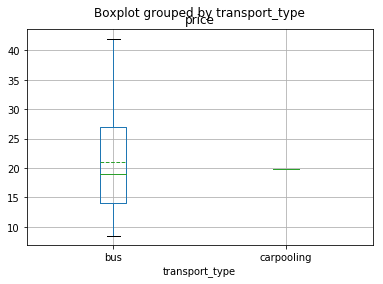

In [25]:
# Compute boxplot for distance < 200 km
dist_200 = ticket_gp_distance.get_group('distance < 200 km')
print('Category : distance < 200 km')
dist_200.boxplot(column = 'price', by = 'transport_type', showfliers = False, showmeans = True, meanline = True)

Category : 200 km <= distance < 800 km


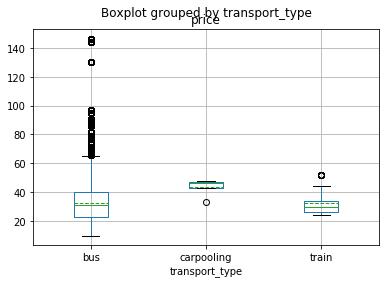

In [26]:
# Compute boxplot for 200 km <= distance < 800 km
dist_800 = ticket_gp_distance.get_group('200 km <= distance < 800 km')
print('Category : 200 km <= distance < 800 km')
dist_800.boxplot(column = 'price', by = 'transport_type', showmeans = True, meanline = True)

Category : 800 km <= distance 


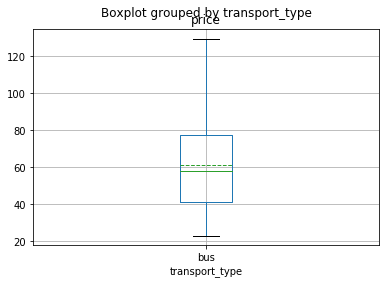

In [16]:
# Compute boxplot for distance >= 800 km
dist_sup_800 = ticket_gp_distance.get_group('800 km <= distance')
print('Category : 800 km <= distance ')
dist_sup_800.boxplot(column = 'price', by = 'transport_type', showfliers = False, showmeans = True, meanline = True)

* On s'aperçoit que **le bus** est le mode de transport principal pour les trajets de moins de 200 km et de plus de 800 km.
* Pour les trajets intermédiaires (200 - 800 km), on constate une moyenne des prix sensiblement identiques pour le bus et le train (~ 32 euros), et une moyenne des prix pour le covoiturage supérieure (43,4 euros).

J'ai pris en compte ici uniquement la distance calculée entre la ville de départ et la ville d'arrivée, il serait intéressant de prendre en compte les informations de la colonne *middle_station* jointes avec la table *stations*. 
On pourrait également regarder les écart de prix pour les trajets en bus en fonction des possibilités offertes par les différentes compagnies (wifi, possibilité de transporter un vélo, prise etc...)

#### Merci pour votre lecture :)